# Problem Statement
Assume that you are working in a consultancy company and one of your client is running an e-commerce company. They are interested in understanding the customer behavior regarding the shopping. They have already collected the users’ session data for a year. Each row belongs to a different user. The “Made_purchase” is an indicator that whether the user has made a purchase or not during that year. Your client is also interested in predicting that column using other attributes of the users. The client also informs you that the data is collected by non-experts. So, it might have some percentage of error in some columns.

## Dataset Description
The first six columns represent the different pages in the e-commerce website visited by a user from other sites.
* HomePage: Number of times visited this page
* HomePage_Duration: Total number of duration spent on this page.
* LandingPage: Number of times visited this page
* LandingPage_Duration: Total number of duration spent on this page.
* ProductDesriptionPage: Number of times visited this page
* ProductDescriptionPage_Duration: Total number of duration spent on this page.
* GoogleMetric-Bounce Rate: Whenever a user comes to any one web-page of the website and he/she does not go to any other page and exits from the website from the same page, then this activity done by the user is called Bounce. And the percentage of the total number of times the user visiting our website and bounce it, is called Bounce Rate
* GoogleMetric-Exit Rate: The bounce rate is calculated based on the user exiting a website after visiting one page. But some users exit from the second, third, fourth, or any other page of our website, then those visitors’ data help determine the exit rate. The percentage of the total number of times the user to our website who do not exit from the first page (Landing Page) but exit after exploring other website pages is called the Exit Rate.
* GoogleMetric-Page Value: Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction.
*SeasonalPurchase: It is a weight indicator to track the seasonal purchase. If a user makes a purchase during any seasonal time (Mother’s Day, Diwali, Valentine's Day), we will assign based on internal heuristic.
*Month_SeasonalPurchase: Month of the special day considered for seasonal purchase.

The other attributes like, OS, Search Engine, Zone, Type of Traffic, Customer Type, Gender, Cookies Setting, Education, Marital Status and Weekend Purchase are self-explanatory variables

## 1. Loading the data

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
test_data = pd.read_csv("/content/test_data_v2.csv")
train_data = pd.read_csv("/content/train_data_v2.csv")
sample_data = pd.read_csv("/content/sample.csv")

In [ ]:
train_data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [ ]:
train_data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


<ipython-input-5-e24b7587129a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


<Axes: >

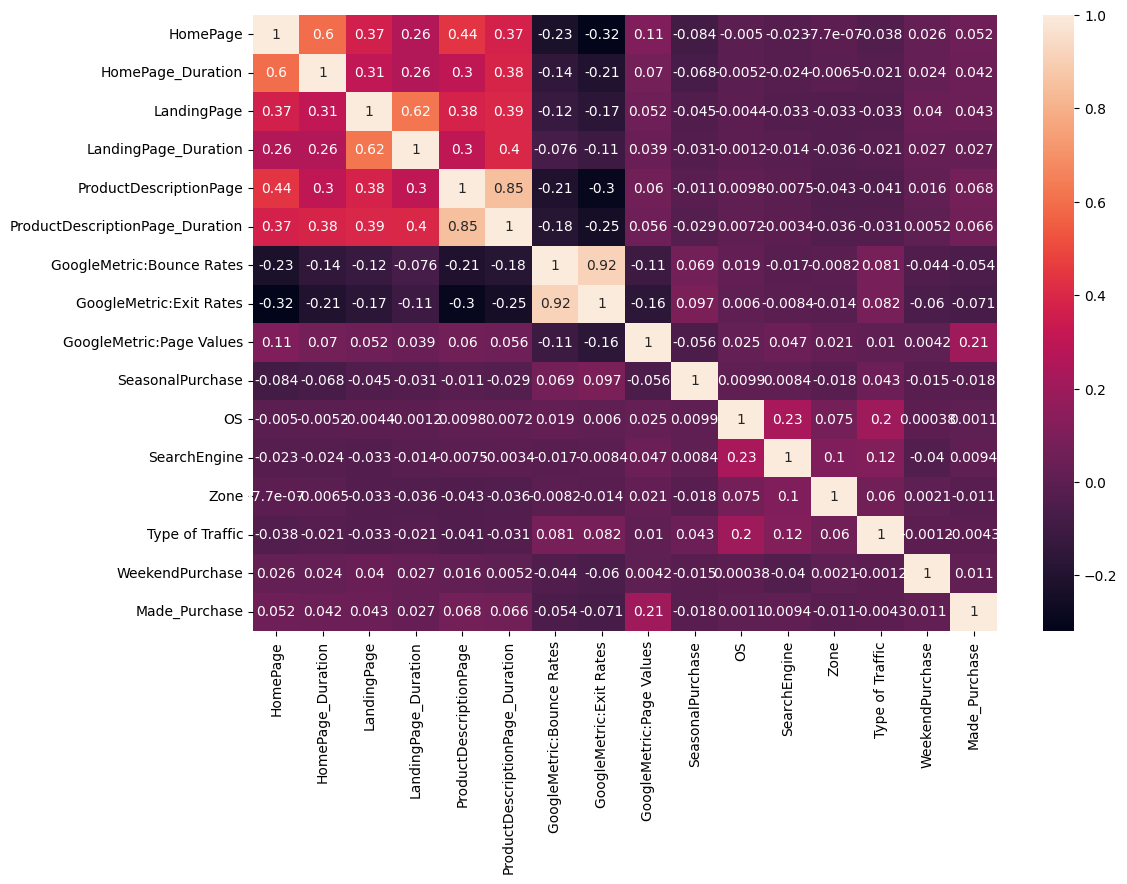

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True)

### ratio of people who made purchase

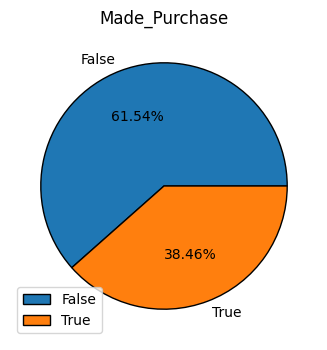

In [ ]:
plt.figure(figsize=(8,4))
plt.pie(train_data.Made_Purchase.value_counts(),
         labels=["False", "True"],
         autopct='%.2f%%',
         wedgeprops = {"edgecolor" : "black",
                       'linewidth': 1,
                       'antialiased': True})
plt.title("Made_Purchase")
plt.legend()
plt.show()

### categorical features in dataset

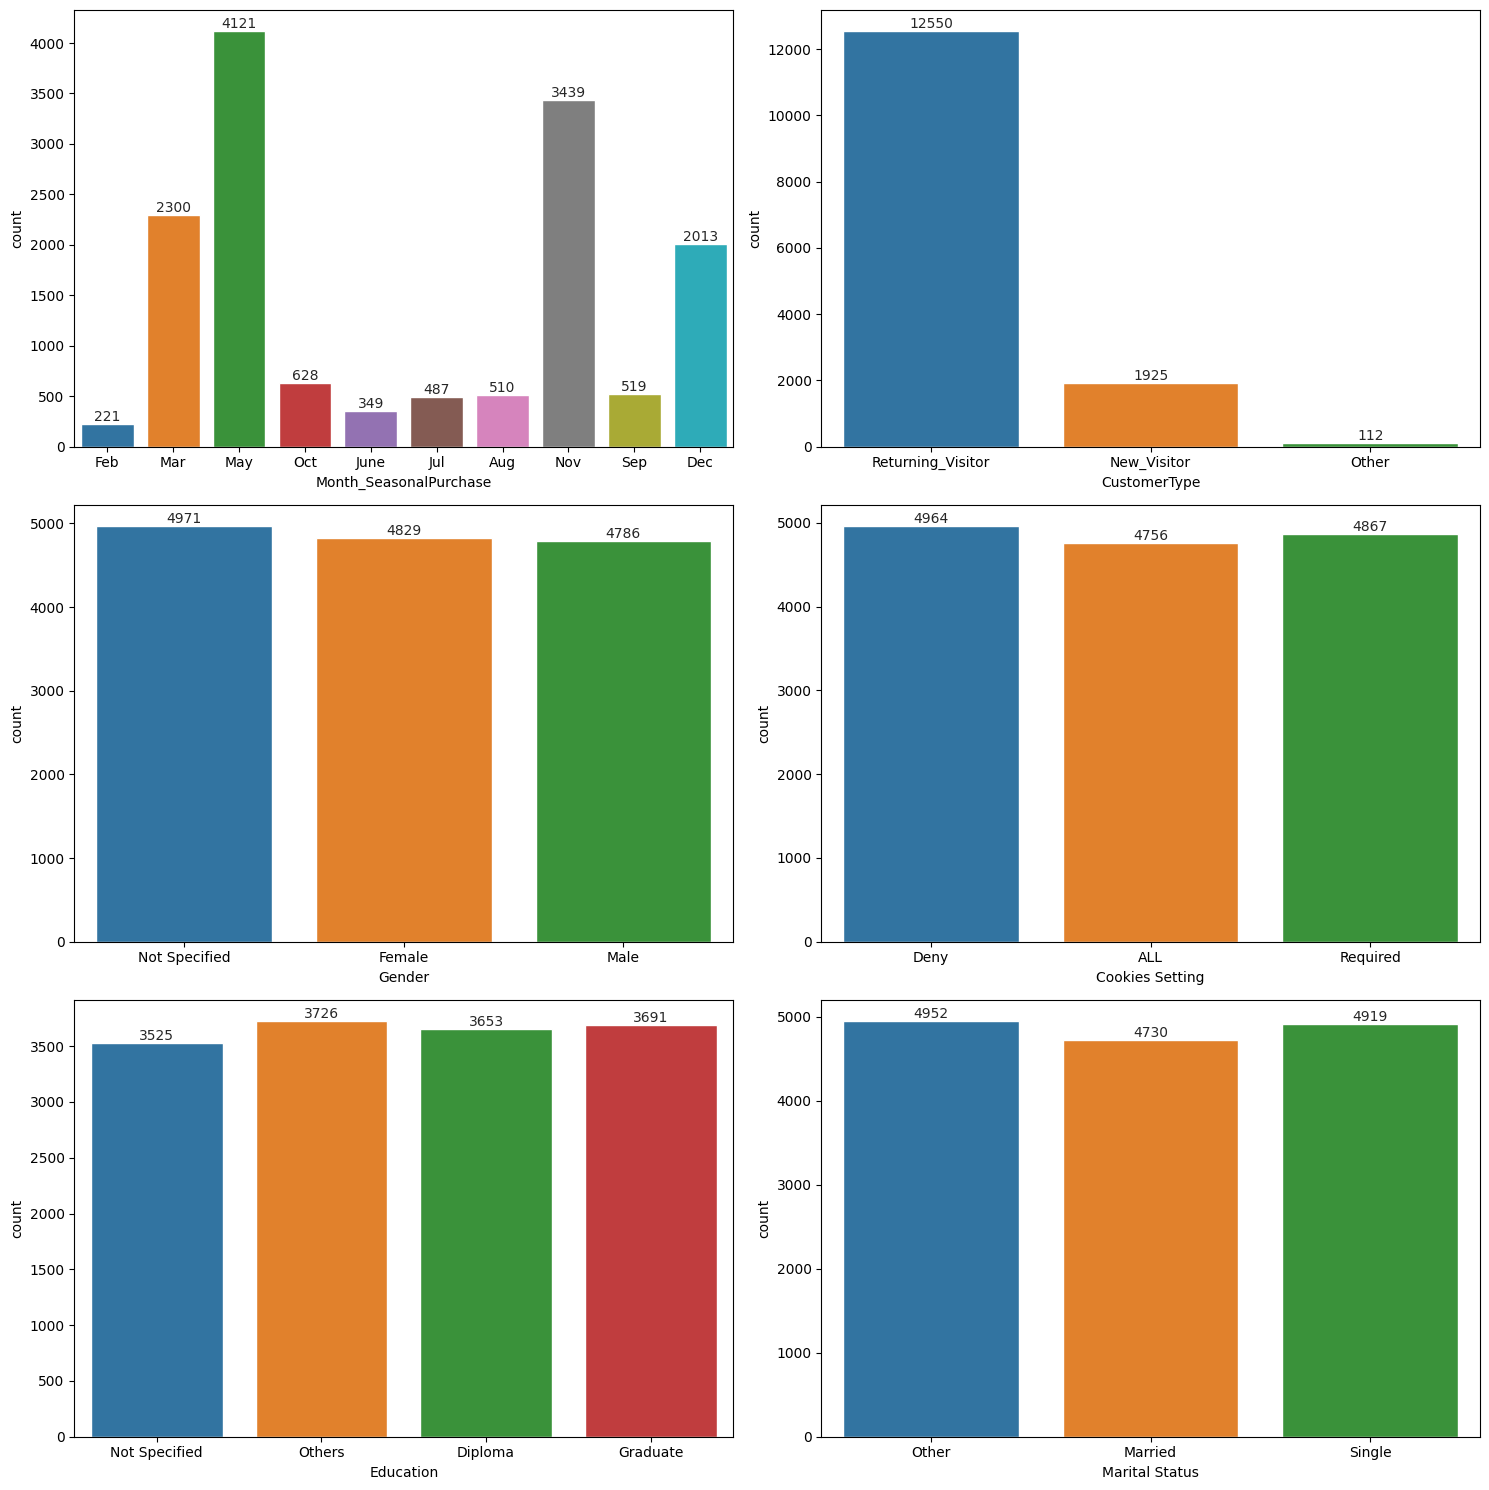

In [ ]:
cols = train_data.select_dtypes(include="object").columns.values
fig, ax = plt.subplots(int(np.ceil(len(cols)/2)), 2, figsize = (15, 15))

j = 0
for i in range(len(cols)):
     sns.set_style("dark")
     pl = sns.countplot(x= train_data[cols[i]], ax = ax[i//2,j])
     pl.bar_label(pl.containers[0])
     j = (j+1)%2
plt.tight_layout()
plt.show()

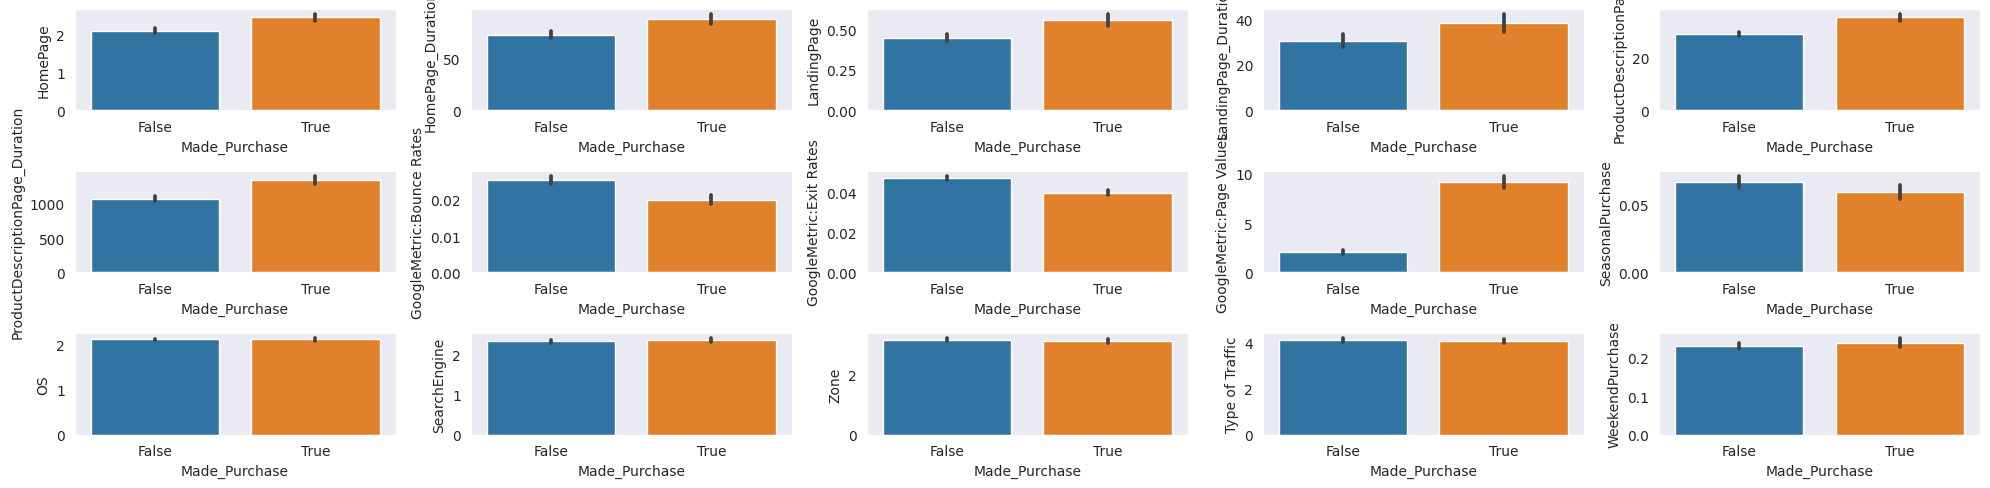

In [ ]:
cols=train_data.select_dtypes(include=np.number).columns.values
num_chart_cols = 5
fig, ax = plt.subplots(int(np.ceil(len(cols)/num_chart_cols)), num_chart_cols, figsize = (20, 5))

j = 0
for i in range(len(cols)):
     sns.set_style("darkgrid")
     sns.barplot(y=train_data[cols[i]], x=train_data['Made_Purchase'], ax = ax[i//num_chart_cols,j])
     j = (j+1)%num_chart_cols
plt.tight_layout()
plt.show()

* The users who visit frequently are more likely to purchase products.
* The users who spend more time on pages are more likely to purchase products.
* Higher the bounce/exit rate, less the chances of making purchase.
* High Page value is an important measure to determine whether product purchased or not.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

*   **Numerical Features** : HomePage, HomePage_Duration, LandingPage, LandingPage_Duration, ProductDescriptionPage, ProductDescriptionPage_Duration, GoogleMetric:Bounce Rates, GoogleMetric:Exit Rates, GoogleMetric:Page Values
*   **Categories Features** : Month_SeasonalPurchase, CustomerType, Gender, Cookies Setting, Education, Marital Status, WeekendPurchase, Made_Purchase

* SeasonalPurchase, OS, SearchEngine, Zone, Type of Traffic features may look like numerical, but are categorical in nature.






## 2. Data Preprocessing

In [ ]:
categorical_cols = ['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting', 'Marital Status', 'Education']

encoded_cols = pd.get_dummies(train_data[categorical_cols])
encoded_cols_test = pd.get_dummies(test_data[categorical_cols])

train_df = pd.concat([train_data, encoded_cols], axis=1)
test_df = pd.concat([test_data, encoded_cols_test], axis=1)

In [ ]:
train_df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Cookies Setting_ALL,Cookies Setting_Deny,Cookies Setting_Required,Marital Status_Married,Marital Status_Other,Marital Status_Single,Education_Diploma,Education_Graduate,Education_Not Specified,Education_Others
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0,1,0,0,1,0,0,0,1,0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,0,1,0,1,0,0,0,0,0,1
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,1,0,0,0,0,1,1,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,0,1,0,0,1,0,1,0,0,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [ ]:
train_df.drop(categorical_cols , axis=1, inplace=True)
test_df.drop(categorical_cols, axis=1, inplace=True)

In [ ]:
train_df.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
WeekendPurchase                    121
Made_Purchase                        0
Month_SeasonalPurchase_Aug           0
Month_SeasonalPurchase_Dec           0
Month_SeasonalPurchase_Feb           0
Month_SeasonalPurchase_Jul           0
Month_SeasonalPurchase_June          0
Month_SeasonalPurchase_Mar           0
Month_SeasonalPurchase_May           0
Month_SeasonalPurchase_Nov           0
Month_SeasonalPurchase_Oct           0
Month_SeasonalPurchase_Se

### Imputing missing values

In [ ]:
from sklearn.impute import SimpleImputer

# create a mean imputer object
mean_imputer = SimpleImputer(strategy='mean')

# apply mean imputation on the missing values of test_df
test_df = pd.DataFrame(mean_imputer.fit_transform(test_df), columns=test_df.columns)

# apply mean imputation on the missing values of train_df
train_df = pd.DataFrame(mean_imputer.fit_transform(train_df), columns=train_df.columns)



### Scaling the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
#scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Select the columns you want to scale
columns_to_scale = ['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine',
       'Zone', 'Type of Traffic', 'WeekendPurchase',
       'Month_SeasonalPurchase_Aug', 'Month_SeasonalPurchase_Dec',
       'Month_SeasonalPurchase_Feb', 'Month_SeasonalPurchase_Jul',
       'Month_SeasonalPurchase_June', 'Month_SeasonalPurchase_Mar',
       'Month_SeasonalPurchase_May', 'Month_SeasonalPurchase_Nov',
       'Month_SeasonalPurchase_Oct', 'Month_SeasonalPurchase_Sep',
       'CustomerType_New_Visitor', 'CustomerType_Other',
       'CustomerType_Returning_Visitor', 'Gender_Female', 'Gender_Male',
       'Gender_Not Specified', 'Cookies Setting_ALL', 'Cookies Setting_Deny',
       'Cookies Setting_Required', 'Marital Status_Married','Marital Status_Other', 'Marital Status_Single', 'Education_Diploma',
       'Education_Graduate', 'Education_Not Specified', 'Education_Others']

# Fit and transform the selected columns using StandardScaler
train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])
test_df[columns_to_scale] = scaler.fit_transform(test_df[columns_to_scale])


Splitting Dataset

In [ ]:
xtrain = train_df.drop('Made_Purchase', axis='columns')
ytrain = train_df['Made_Purchase']

Baseline Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#?LogisticRegression
model1 = LogisticRegression(random_state=64,max_iter=1000)
model1.fit(xtrain,ytrain)
scores1 = cross_val_score(model1, xtrain, ytrain, cv=20)

# Print the mean cross-validation score
print("Mean cross-validation score:", scores1.mean())

Mean cross-validation score: 0.6285841358916878


In [ ]:
'''from sklearn.svm import SVC
clf = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', random_state=None)
model2 = clf.fit(xtrain, ytrain)
scores2 = cross_val_score(model2, xtrain, ytrain, cv=20)
print("Mean cross-validation score:", scores2.mean())'''

'from sklearn.svm import SVC\n#?SVC\nclf = SVC(C=1.0, kernel=\'rbf\', degree=3, gamma=\'auto\', random_state=None)\nmodel2 = clf.fit(xtrain, ytrain)  \nscores2 = cross_val_score(model2, xtrain, ytrain, cv=20) \nprint("Mean cross-validation score:", scores2.mean())'

DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion' : ['entropy','gini','log_loss'] ,
              'splitter' : ['random' , 'best'],
              'max_depth' : [3,4,5,6],
              'min_samples_leaf' : [2,4,6,8,10]}
#?DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=64)
clf = GridSearchCV(dtc, param_grid = param_grid, cv=20)
clf.fit(xtrain,ytrain)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=64),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['random', 'best']})

In [ ]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 10,
 'splitter': 'best'}

In [ ]:
clf.best_score_

0.6473757079228364

RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=64 )
params = {'n_estimators':[100,200,300],
          'max_depth':[2,6,8,10]}


model3 = GridSearchCV(rfc, param_grid=params , cv=20)

model3.fit(xtrain,ytrain)

GridSearchCV(cv=20, estimator=RandomForestClassifier(random_state=64),
             param_grid={'max_depth': [2, 6, 8, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
model3.best_params_

{'max_depth': 6, 'n_estimators': 300}

In [ ]:
model3.best_score_

0.6449304244587339

AdaBoost Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(learning_rate=0.001, random_state=0)
params = {'n_estimators':[100,300]}


model4 = GridSearchCV(abc, param_grid=params , cv=20)

model4.fit(xtrain,ytrain)

GridSearchCV(cv=20,
             estimator=AdaBoostClassifier(learning_rate=0.001, random_state=0),
             param_grid={'n_estimators': [100, 300]})

In [ ]:
model4.best_params_

{'n_estimators': 300}

In [ ]:
model4.best_score_

0.656055874284703

In [ ]:
ypred = model4.predict(test_df)
ypred = ypred.astype(bool)
ypred

array([False, False, False, ..., False, False, False])

## Final Submission

In [ ]:
submission=pd.DataFrame(columns=['id', 'Made_Purchase'])
submission['id']=[i for i in range(len(ypred))]
submission["Made_Purchase"]=[i for i in ypred]
submission.to_csv('submission.csv',index=False)